In [1]:
import os
import sys 
os.environ["SPARK_HOME"]=os.path.join(os.environ['HOME'],'Downloads','spark-2.0.0-bin-hadoop2.6')
os.environ["PYLIB"]=os.path.join(os.environ["SPARK_HOME"],'python','lib')
sys.path.insert(0,os.path.join(os.environ["PYLIB"],'py4j-0.10.1-src.zip'))
sys.path.insert(0,os.path.join(os.environ["PYLIB"],'pyspark.zip'))

In [2]:
#이거꼭해주기
import pyspark
myConf=pyspark.SparkConf()
spark = pyspark.sql.SparkSession.builder.master("local").appName("myApp").config(conf=myConf).config('spark.sql.warehouse.dir','file:///C:/Users/DongkyuShin/Desktop/bigdata/s_201111235/201111235/src').getOrCreate()

In [3]:
for i in sys.path:
    print i

C:\Users\DongkyuShin\Downloads\spark-2.0.0-bin-hadoop2.6\python\lib\pyspark.zip
C:\Users\DongkyuShin\AppData\Local\Temp\spark-779fd304-251f-4ab4-811f-0bd8da8aa06e\userFiles-5f9d0d89-5697-4ab9-961a-409c865914c1
C:\Users\DongkyuShin\Downloads\spark-2.0.0-bin-hadoop2.6\python\lib\py4j-0.10.1-src.zip

C:\Users\DongkyuShin\Anaconda2\python27.zip
C:\Users\DongkyuShin\Anaconda2\DLLs
C:\Users\DongkyuShin\Anaconda2\lib
C:\Users\DongkyuShin\Anaconda2\lib\plat-win
C:\Users\DongkyuShin\Anaconda2\lib\lib-tk
C:\Users\DongkyuShin\Anaconda2
C:\Users\DongkyuShin\Anaconda2\lib\site-packages
C:\Users\DongkyuShin\Anaconda2\lib\site-packages\Sphinx-1.5.1-py2.7.egg
C:\Users\DongkyuShin\Anaconda2\lib\site-packages\win32
C:\Users\DongkyuShin\Anaconda2\lib\site-packages\win32\lib
C:\Users\DongkyuShin\Anaconda2\lib\site-packages\Pythonwin
C:\Users\DongkyuShin\Anaconda2\lib\site-packages\setuptools-27.2.0-py2.7.egg
C:\Users\DongkyuShin\Anaconda2\lib\site-packages\IPython\extensions
C:\Users\DongkyuShin\.ipython


In [30]:
import pyspark
myConf=pyspark.SparkConf()
spark = pyspark.sql.SparkSession.builder\
    .master("local")\
    .appName("myApp")\
    .config(conf=myConf)\
    .getOrCreate()

In [31]:
print spark.version
print spark.conf.get('spark.app.name')
print spark.conf.get('spark.master')
print spark.conf.get('spark.driver.host')

2.0.0
pyspark-shell
local[*]
172.16.24.243


In [46]:
print spark.conf.get('spark.jars.packages')

Py4JJavaError: An error occurred while calling o35.get.
: java.util.NoSuchElementException: spark.jars.packages
	at org.apache.spark.sql.internal.SQLConf$$anonfun$getConfString$2.apply(SQLConf.scala:735)
	at org.apache.spark.sql.internal.SQLConf$$anonfun$getConfString$2.apply(SQLConf.scala:735)
	at scala.Option.getOrElse(Option.scala:121)
	at org.apache.spark.sql.internal.SQLConf.getConfString(SQLConf.scala:735)
	at org.apache.spark.sql.RuntimeConfig.get(RuntimeConfig.scala:68)
	at sun.reflect.GeneratedMethodAccessor35.invoke(Unknown Source)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(Unknown Source)
	at java.lang.reflect.Method.invoke(Unknown Source)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:237)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:280)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:128)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:211)
	at java.lang.Thread.run(Unknown Source)


In [ ]:
myList=[1,2,3,4,5,6,7]
myRdd1 = spark.sparkContext.parallelize(myList)
myRdd1.take(3)

In [ ]:
%%writefile data\ds_spark_wiki.txt
Wikipedia
Apache Spark is an open source cluster computing framework.
아파치 스파크는 오픈 소스 클러스터 컴퓨팅 프레임워크이다.
Apache Spark Apache Spark Apache Spark Apache Spark
아파치 스파크 아파치 스파크 아파치 스파크 아파치 스파크
Originally developed at the University of California, Berkeley's AMPLab,
the Spark codebase was later donated to the Apache Software Foundation,
which has maintained it since.
Spark provides an interface for programming entire clusters with
implicit data parallelism and fault-tolerance.

In [7]:
import os
myDf=spark.read.text(os.path.join("data", "ds_spark_wiki.txt"))
print myDf.take(1)

[Row(value=u'Wikipedia')]


In [8]:
myRdd2=spark.sparkContext\
    .textFile(os.path.join("data","ds_spark_wiki.txt"))
print myRdd2.first()

Wikipedia


In [9]:
%%writefile ./data/ds_spark_2cols.csv
35, 2
40, 27
12, 38
15, 31
21, 1
14, 19
46, 1
10, 34
28, 3
48, 1
16, 2
30, 3
32, 2
48, 1
31, 2
22, 1
12, 3
39, 29
19, 37
25, 2

Overwriting ./data/ds_spark_2cols.csv


In [10]:
myRdd3 = spark.sparkContext\
    .textFile(os.path.join("data","ds_spark_2cols.csv"))
myRdd3.take(5)

[u'35, 2', u'40, 27', u'12, 38', u'15, 31', u'21, 1']

In [11]:
myRdd4 = myRdd3.map(lambda line: line.split(','))
myRdd4.take(5)

[[u'35', u' 2'],
 [u'40', u' 27'],
 [u'12', u' 38'],
 [u'15', u' 31'],
 [u'21', u' 1']]

In [12]:
celsius = [39.2, 36.5, 37.3, 37.8]
def c2f(c):
    f=list()
    for i in c:
        _f=(float(9)/5)*i + 32
        f.append(_f)
    return f

print c2f(celsius)

[102.56, 97.7, 99.14, 100.03999999999999]


In [13]:
celsius = [39.2, 36.5, 37.3, 37.8]
def c2f(c):
    return (float(9)/5)*c + 32

f=map(c2f, celsius)
print f

[102.56, 97.7, 99.14, 100.03999999999999]


In [76]:
map(lambda c:(float(9)/5)*c + 32, celsius)

[102.56, 97.7, 99.14, 100.03999999999999]

In [77]:
sentence = 'Hello World'
words = sentence.split()
print words

['Hello', 'World']


In [78]:
nRdd = spark.sparkContext.parallelize([1, 2, 3, 4])
squared = nRdd.map(lambda x: x * x).collect()
print squared

[1, 4, 9, 16]


In [79]:
myRdd100 = spark.sparkContext.parallelize(range(1,101))
myRdd100.reduce(lambda x,y: x+y)

5050

In [80]:
print nRdd.sum(), nRdd.min(), nRdd.max(), nRdd.stdev(), nRdd.variance()

10 1 4 1.11803398875 1.25


In [81]:
words=myRdd2.map(lambda x:x.split(' '))

In [82]:
def mySplit(x):
    return x.split(" ")

words=myRdd2.map(mySplit)

In [83]:
words.take(3)

[[u'Wikipedia'],
 [u'Apache',
  u'Spark',
  u'is',
  u'an',
  u'open',
  u'source',
  u'cluster',
  u'computing',
  u'framework.'],
 [u'\uc544\ud30c\uce58',
  u'\uc2a4\ud30c\ud06c\ub294',
  u'\uc624\ud508',
  u'\uc18c\uc2a4',
  u'\ud074\ub7ec\uc2a4\ud130',
  u'\ucef4\ud4e8\ud305',
  u'\ud504\ub808\uc784\uc6cc\ud06c\uc774\ub2e4.']]

In [84]:
for line in words.collect():
    for word in line:
        print word,
    print "\n-----"

Wikipedia 
-----
Apache Spark is an open source cluster computing framework. 
-----
아파치 스파크는 오픈 소스 클러스터 컴퓨팅 프레임워크이다. 
-----
Apache Spark Apache Spark Apache Spark Apache Spark 
-----
아파치 스파크 아파치 스파크 아파치 스파크 아파치 스파크 
-----
Originally developed at the University of California, Berkeley's AMPLab, 
-----
the Spark codebase was later donated to the Apache Software Foundation, 
-----
which has maintained it since. 
-----
Spark provides an interface for programming entire clusters with 
-----
implicit data parallelism and fault-tolerance. 
-----


In [85]:
myList=[('1','kim, js',170),
        ('1','lee, sm', 175),
        ('2','lim, yg',180),
        ('2','lee',170)]
myDf=spark.createDataFrame(myList)


In [86]:
myDf.printSchema()
print myDf.take(1)

root
 |-- _1: string (nullable = true)
 |-- _2: string (nullable = true)
 |-- _3: long (nullable = true)

[Row(_1=u'1', _2=u'kim, js', _3=170)]


In [87]:
print spark.createDataFrame(myList, ['year','name','height']).take(1)

[Row(year=u'1', name=u'kim, js', height=170)]


In [15]:
names = ["kim","lee","lee","lim"]
items = ["espresso","latte","americano","affocato","long black","macciato"]
df = spark.createDataFrame([(names[i%4], items[i%5]) for i in range(100)],\
                           ["name","item"])
df.show(10)

+----+----------+
|name|      item|
+----+----------+
| kim|  espresso|
| lee|     latte|
| lee| americano|
| lim|  affocato|
| kim|long black|
| lee|  espresso|
| lee|     latte|
| lim| americano|
| kim|  affocato|
| lee|long black|
+----+----------+
only showing top 10 rows



In [16]:
from pyspark.sql import Row
cfile= os.path.join(os.environ["SPARK_HOME"],\
           "examples/src/main/resources/people.txt")
lines = spark.sparkContext.textFile(cfile)
parts = lines.map(lambda l: l.split(","))
people = parts.map(lambda p: Row(name=p[0], age=int(p[1].strip())))

_myDf = spark.createDataFrame(people)
_myDf.printSchema()
_myDf.collect()

root
 |-- age: long (nullable = true)
 |-- name: string (nullable = true)



[Row(age=29, name=u'Michael'),
 Row(age=30, name=u'Andy'),
 Row(age=19, name=u'Justin')]

In [47]:
%%writefile data/ds_spark.csv
1,2,3,4
11,22,33,44
111,222,333,444

Overwriting data/ds_spark.csv


In [48]:
df = spark.read.format('com.databricks.spark.csv')\
    .options(header='true', inferschema='true').load('data/ds_spark.csv')
df.show()

+---+---+---+---+
|  1|  2|  3|  4|
+---+---+---+---+
| 11| 22| 33| 44|
|111|222|333|444|
+---+---+---+---+



In [18]:
import numpy as np
np.array([float(x) for x in '1.658985	4.285136'.split('\t')])

array([ 1.658985,  4.285136])

In [19]:
import numpy as np
np.array([float(x) for x in '1.658985 4.285136'.split(' ')])

array([ 1.658985,  4.285136])

In [20]:
%%writefile data/ds_spark_heightweight.txt
1	65.78	112.99
2	71.52	136.49
3	69.40	153.03
4	68.22	142.34
5	67.79	144.30
6	68.70	123.30
7	69.80	141.49
8	70.01	136.46
9	67.90	112.37
10	66.78	120.67
11	66.49	127.45
12	67.62	114.14
13	68.30	125.61
14	67.12	122.46
15	68.28	116.09
16	71.09	140.00
17	66.46	129.50
18	68.65	142.97
19	71.23	137.90
20	67.13	124.04
21	67.83	141.28
22	68.88	143.54
23	63.48	97.90
24	68.42	129.50
25	67.63	141.85
26	67.21	129.72
27	70.84	142.42
28	67.49	131.55
29	66.53	108.33
30	65.44	113.89
31	69.52	103.30
32	65.81	120.75
33	67.82	125.79
34	70.60	136.22
35	71.80	140.10
36	69.21	128.75
37	66.80	141.80
38	67.66	121.23
39	67.81	131.35
40	64.05	106.71
41	68.57	124.36
42	65.18	124.86
43	69.66	139.67
44	67.97	137.37
45	65.98	106.45
46	68.67	128.76
47	66.88	145.68
48	67.70	116.82
49	69.82	143.62
50	69.09	134.93

Overwriting data/ds_spark_heightweight.txt


In [21]:
from pyspark.sql.types import *
rdd=spark.sparkContext\
    .textFile(os.path.join('data','ds_spark_heightweight.txt'))

tRdd=rdd.map(lambda x:x.split('\t'))
tDf=spark.createDataFrame(tRdd)
tDf.printSchema()

root
 |-- _1: string (nullable = true)
 |-- _2: string (nullable = true)
 |-- _3: string (nullable = true)



In [22]:
tDf.take(1)

[Row(_1=u'1', _2=u'65.78', _3=u'112.99')]

In [23]:
tDf=tDf.withColumn("id",tDf['_1'].cast("integer")).drop('_1')
tDf=tDf.withColumn("height",tDf['_2'].cast("double")).drop('_2')
tDf=tDf.withColumn("weight",tDf['_3'].cast("double")).drop('_3')

In [24]:
import numpy as np
_weightRdd=tDf.rdd.map(lambda fields:fields[1]).collect()
_heightRdd=tDf.rdd.map(lambda fields:fields[2]).collect()
print np.array(_weightRdd)[:5]
print np.array(_heightRdd)[:5]

[ 65.78  71.52  69.4   68.22  67.79]
[ 112.99  136.49  153.03  142.34  144.3 ]


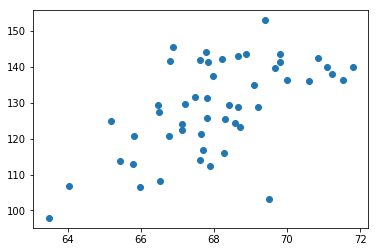

In [25]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

plt.plot(np.array(_weightRdd), np.array(_heightRdd),'o')
plt.show()

In [26]:
jfile= os.path.join(os.environ["SPARK_HOME"],\
           "examples/src/main/resources/people.json")

_myDf= spark.read.json(jfile)
_myDf.filter(_myDf['age'] > 21).show()

+---+----+
|age|name|
+---+----+
| 30|Andy|
+---+----+



In [27]:
import requests
r=requests.get("https://raw.githubusercontent.com/jokecamp/FootballData/master/World%20Cups/all-world-cup-players.json")
wc=r.json()

In [28]:
print type(wc), type(wc[0])

<type 'list'> <type 'dict'>


In [29]:
wc[0]

{u'Club': u'Club Atl\xc3\xa9tico Talleres de Remedios de Escalada',
 u'ClubCountry': u'Argentina',
 u'Competition': u'World Cup',
 u'DateOfBirth': u'1905-5-5',
 u'FullName': u'\xc3ngel Bossio',
 u'IsCaptain': False,
 u'Number': u'',
 u'Position': u'GK',
 u'Team': u'Argentina',
 u'Year': 1930}

In [49]:
wcDF=spark.createDataFrame(wc)
wcDF.printSchema()
wcDF.take(1)

C:\Users\DongkyuShin\Downloads\spark-2.0.0-bin-hadoop2.6\python\lib\pyspark.zip\pyspark\sql\session.py:316: UserWarning: inferring schema from dict is deprecated,please use pyspark.sql.Row instead
  warnings.warn("inferring schema from dict is deprecated,"


root
 |-- Club: string (nullable = true)
 |-- ClubCountry: string (nullable = true)
 |-- Competition: string (nullable = true)
 |-- DateOfBirth: string (nullable = true)
 |-- FullName: string (nullable = true)
 |-- IsCaptain: boolean (nullable = true)
 |-- Number: string (nullable = true)
 |-- Position: string (nullable = true)
 |-- Team: string (nullable = true)
 |-- Year: long (nullable = true)



[Row(Club=u'Club Atl\xc3\xa9tico Talleres de Remedios de Escalada', ClubCountry=u'Argentina', Competition=u'World Cup', DateOfBirth=u'1905-5-5', FullName=u'\xc3ngel Bossio', IsCaptain=False, Number=u'', Position=u'GK', Team=u'Argentina', Year=1930)]

In [50]:
wcRdd=spark.sparkContext.parallelize(wc)
wcRdd.take(1)
from pyspark.sql.types import *
wcSchema=StructType([
    StructField("Club", StringType(), True),
    StructField("ClubCountry", StringType(), True),
    StructField("Competition", StringType(), True),
    StructField("DateOfBirth", DateType(), True),
    StructField("FullName", StringType(), True),
    StructField("IsCaptain", BooleanType(), True),
    StructField("Number", IntegerType(), True),
    StructField("Position", StringType(), True),
    StructField("Team", StringType(), True),
    StructField("Year", IntegerType(), True)
])

wcDF=spark.createDataFrame(wcRdd)
wcDF.printSchema()
wcDF.take(1)

C:\Users\DongkyuShin\Downloads\spark-2.0.0-bin-hadoop2.6\python\lib\pyspark.zip\pyspark\sql\session.py:336: UserWarning: Using RDD of dict to inferSchema is deprecated. Use pyspark.sql.Row instead
  warnings.warn("Using RDD of dict to inferSchema is deprecated. "


root
 |-- Club: string (nullable = true)
 |-- ClubCountry: string (nullable = true)
 |-- Competition: string (nullable = true)
 |-- DateOfBirth: string (nullable = true)
 |-- FullName: string (nullable = true)
 |-- IsCaptain: boolean (nullable = true)
 |-- Number: string (nullable = true)
 |-- Position: string (nullable = true)
 |-- Team: string (nullable = true)
 |-- Year: long (nullable = true)



[Row(Club=u'Club Atl\xc3\xa9tico Talleres de Remedios de Escalada', ClubCountry=u'Argentina', Competition=u'World Cup', DateOfBirth=u'1905-5-5', FullName=u'\xc3ngel Bossio', IsCaptain=False, Number=u'', Position=u'GK', Team=u'Argentina', Year=1930)]

In [54]:
from datetime import datetime
print datetime.strptime("12/12/1992", '%m/%d/%Y')

1992-12-12 00:00:00


In [55]:
wcDF=wcDF.withColumn('DoB', wcDF['DateOfBirth'].cast(DateType()))
wcDF=wcDF.withColumn('NumberInt', wcDF['Number'].cast("integer"))
wcDF.printSchema()
wcDF.take(1)

root
 |-- Club: string (nullable = true)
 |-- ClubCountry: string (nullable = true)
 |-- Competition: string (nullable = true)
 |-- DateOfBirth: string (nullable = true)
 |-- FullName: string (nullable = true)
 |-- IsCaptain: boolean (nullable = true)
 |-- Number: string (nullable = true)
 |-- Position: string (nullable = true)
 |-- Team: string (nullable = true)
 |-- Year: long (nullable = true)
 |-- DoB: date (nullable = true)
 |-- NumberInt: integer (nullable = true)



[Row(Club=u'Club Atl\xc3\xa9tico Talleres de Remedios de Escalada', ClubCountry=u'Argentina', Competition=u'World Cup', DateOfBirth=u'1905-5-5', FullName=u'\xc3ngel Bossio', IsCaptain=False, Number=u'', Position=u'GK', Team=u'Argentina', Year=1930, DoB=datetime.date(1905, 5, 5), NumberInt=None)]

In [61]:
from pyspark.sql import Row
Person = Row('year','name', 'height')
row1=Person('1','kim, js',170)
print "row1: ",row1.year, row1.name

row1:  1 kim, js


In [64]:
myRows = [row1,
          Person('1','lee, sm', 175),
          Person('2','lim, yg',180),
          Person('2','lee',170)]

myDf=spark.createDataFrame(myRows)

In [65]:
myDf.printSchema()
myDf.show()


root
 |-- year: string (nullable = true)
 |-- name: string (nullable = true)
 |-- height: long (nullable = true)

+----+-------+------+
|year|   name|height|
+----+-------+------+
|   1|kim, js|   170|
|   1|lee, sm|   175|
|   2|lim, yg|   180|
|   2|    lee|   170|
+----+-------+------+



In [66]:
wcDF=wcDF.withColumnRenamed('ClubCountry','ClubNation')
wcDF.printSchema()

root
 |-- Club: string (nullable = true)
 |-- ClubNation: string (nullable = true)
 |-- Competition: string (nullable = true)
 |-- DateOfBirth: string (nullable = true)
 |-- FullName: string (nullable = true)
 |-- IsCaptain: boolean (nullable = true)
 |-- Number: string (nullable = true)
 |-- Position: string (nullable = true)
 |-- Team: string (nullable = true)
 |-- Year: long (nullable = true)
 |-- DoB: date (nullable = true)
 |-- NumberInt: integer (nullable = true)



In [67]:
_name=myDf.select('name')
_name.rdd.collect()

[Row(name=u'kim, js'),
 Row(name=u'lee, sm'),
 Row(name=u'lim, yg'),
 Row(name=u'lee')]

In [68]:
r=Row(name=u'kim, js')
rd=r.asDict()
print rd.values()[0].split(',')


[u'kim', u' js']


In [69]:
myDf.where(myDf['height'] < 175)\
    .select(myDf['name'], myDf['height']).show()
myDf.groupby(myDf['year']).max().show()

+-------+------+
|   name|height|
+-------+------+
|kim, js|   170|
|    lee|   170|
+-------+------+

+----+-----------+
|year|max(height)|
+----+-----------+
|   1|        175|
|   2|        180|
+----+-----------+



In [70]:
from pyspark.sql.functions import udf
from pyspark.sql.types import DoubleType

toDoublefunc = udf(lambda x: float(x),DoubleType())
myDf = myDf.withColumn("heightD",toDoublefunc(myDf.height))
print int('1')


1


In [71]:
from pyspark.sql.functions import udf, struct
from pyspark.sql.types import IntegerType
toint=udf(lambda x:int(x),IntegerType())
myDf=myDf.withColumn("yearI",toint(myDf['year']))

myDf.printSchema()
myDf.show()

root
 |-- year: string (nullable = true)
 |-- name: string (nullable = true)
 |-- height: long (nullable = true)
 |-- heightD: double (nullable = true)
 |-- yearI: integer (nullable = true)

+----+-------+------+-------+-----+
|year|   name|height|heightD|yearI|
+----+-------+------+-------+-----+
|   1|kim, js|   170|  170.0|    1|
|   1|lee, sm|   175|  175.0|    1|
|   2|lim, yg|   180|  180.0|    2|
|   2|    lee|   170|  170.0|    2|
+----+-------+------+-------+-----+



In [72]:
wcDF.printSchema()

root
 |-- Club: string (nullable = true)
 |-- ClubNation: string (nullable = true)
 |-- Competition: string (nullable = true)
 |-- DateOfBirth: string (nullable = true)
 |-- FullName: string (nullable = true)
 |-- IsCaptain: boolean (nullable = true)
 |-- Number: string (nullable = true)
 |-- Position: string (nullable = true)
 |-- Team: string (nullable = true)
 |-- Year: long (nullable = true)
 |-- DoB: date (nullable = true)
 |-- NumberInt: integer (nullable = true)



In [73]:
wcDF.createOrReplaceTempView("wc")
spark.sql("select Club,Team,Year from wc").show(1)


+--------------------+---------+----+
|                Club|     Team|Year|
+--------------------+---------+----+
|Club AtlÃ©tico Ta...|Argentina|1930|
+--------------------+---------+----+
only showing top 1 row



In [74]:
spark.catalog.listTables()

[Table(name=u'wc', database=None, description=None, tableType=u'TEMPORARY', isTemporary=True)]

In [75]:
wcDF.createOrReplaceTempView("wc")
wcPlayers=spark.sql("select FullName,Club,Team,Year from wc")

In [76]:
namesRdd=wcPlayers.rdd.map(lambda x: "Full name: "+x[0])
for e in namesRdd.take(5):
    print e

Full name: Ãngel Bossio
Full name: Juan Botasso
Full name: Roberto Cherro
Full name: Alberto Chividini
Full name: 


In [77]:
import os
import urllib
_url = 'http://kdd.ics.uci.edu/databases/kddcup99/kddcup.data_10_percent.gz'
_fname = os.path.join(os.getcwd(),'data','kddcup.data_10_percent.gz')
if(not os.path.exists(_fname)):
    print "%s data does not exist! retrieving.." % _fname
    _f=urllib.urlretrieve(_url,_fname)

C:\Users\DongkyuShin\Desktop\bigdata\s_201111235\201111235\data\kddcup.data_10_percent.gz data does not exist! retrieving..


In [79]:
_rdd = spark.sparkContext.textFile(_fname)

In [80]:
_rdd.count()

494021

In [82]:
_rdd.take(3)

[u'0,tcp,http,SF,181,5450,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.00,0.00,0.00,0.00,1.00,0.00,0.00,9,9,1.00,0.00,0.11,0.00,0.00,0.00,0.00,0.00,normal.',
 u'0,tcp,http,SF,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.00,0.00,0.00,0.00,1.00,0.00,0.00,19,19,1.00,0.00,0.05,0.00,0.00,0.00,0.00,0.00,normal.',
 u'0,tcp,http,SF,235,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.00,0.00,0.00,0.00,1.00,0.00,0.00,29,29,1.00,0.00,0.03,0.00,0.00,0.00,0.00,0.00,normal.']

In [85]:
_normal = _rdd.filter(lambda x: 'normal.' in x)
print _normal.count()
_csvRdd=_rdd.map(lambda x: x.split(','))
print _csvRdd.take(1)

97278
[[u'0', u'tcp', u'http', u'SF', u'181', u'5450', u'0', u'0', u'0', u'0', u'0', u'1', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'8', u'8', u'0.00', u'0.00', u'0.00', u'0.00', u'1.00', u'0.00', u'0.00', u'9', u'9', u'1.00', u'0.00', u'0.11', u'0.00', u'0.00', u'0.00', u'0.00', u'0.00', u'normal.']]


In [87]:
_kv = _csvRdd.map(lambda x: (x[41], 1))
_attack = _kv.reduceByKey(lambda x,y: x+y)
_attack.collect()

[(u'guess_passwd.', 53),
 (u'nmap.', 231),
 (u'warezmaster.', 20),
 (u'rootkit.', 10),
 (u'warezclient.', 1020),
 (u'smurf.', 280790),
 (u'pod.', 264),
 (u'neptune.', 107201),
 (u'normal.', 97278),
 (u'spy.', 2),
 (u'ftp_write.', 8),
 (u'phf.', 4),
 (u'portsweep.', 1040),
 (u'teardrop.', 979),
 (u'buffer_overflow.', 30),
 (u'land.', 21),
 (u'imap.', 12),
 (u'loadmodule.', 9),
 (u'perl.', 3),
 (u'multihop.', 7),
 (u'back.', 2203),
 (u'ipsweep.', 1247),
 (u'satan.', 1589)]

In [88]:
from pyspark.sql import Row

_csv = _rdd.map(lambda l: l.split(","))
_csvRdd = _csv.map(lambda p: 
    Row(
        duration=int(p[0]), 
        protocol=p[1],
        service=p[2],
        flag=p[3],
        src_bytes=int(p[4]),
        dst_bytes=int(p[5])
    )
)

In [89]:
type(_csvRdd)

pyspark.rdd.PipelinedRDD